In [2]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
pd.options.mode.chained_assignment = None
import seaborn as sns
color = sns.color_palette()
plt.style.use('seaborn-notebook')
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.api import OLS
from pandas_profiling import ProfileReport
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

In [3]:
# importing datasets
df = pd.read_csv('./data/SGO-2021-01_Incident_Reports_ADS.csv')
# previewing first 5 rows and last 5 rows of the dataset
df.head().append(df.tail())

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,Investigating Officer Name,Inv. Officer Name - Unknown,Investigating Officer Phone,Inv. Officer Phone - Unknown,Investigating Officer Email,Inv. Officer Email - Unknown,Within ODD?,Within ODD? - CBI,Narrative,Narrative - CBI?
0,540-4671,1,"General Motors, LLC",Monthly,12.0,2022.0,JAN-2023,5G21A6P06N4,,NaN,...,NaN,,NaN,,NaN,,"Unknown, see Narrative",,"On January 13, 2023 GM Cruise Holdings LLC (""C...",NaN
1,540-4670,1,"General Motors, LLC",Monthly,12.0,2022.0,JAN-2023,5G21A6P00P4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"Unknown, see Narrative",,"On January 13, 2023 GM Cruise Holdings LLC (""C...",NaN
2,30412-4642,1,Cruise LLC,Monthly,12.0,2022.0,JAN-2023,5G21A6P06N4,,NaN,...,NaN,,NaN,,NaN,,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"A Cruise autonomous vehicle (""Cruise AV""), ope...",Y
3,30412-4640,1,Cruise LLC,Monthly,12.0,2022.0,JAN-2023,5G21A6P00P4,,NaN,...,[MAY CONTAIN PERSONALLY IDENTIFIABLE INFORMATION],,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,"A Cruise autonomous vehicle (""Cruise AV""), ope...",Y
4,28349-4648,1,"Lucid USA, Inc.",1-Day,NaN,NaN,JAN-2023,50EA1GBA8NA,,NaN,...,NaN,Y,NaN,Y,NaN,Y,"[REDACTED, MAY CONTAIN CONFIDENTIAL BUSINESS I...",Y,Lucid has received telematics and notification...,NaN
513,30270-1,2,Waymo LLC,10-Day Update,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,No update to narrative. Please refer to Waymo ...,NaN
514,30531-6,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",NaN
515,30270-4,1,Waymo LLC,1-Day,NaN,NaN,JUL-2021,SADHW2S14M1,,NaN,...,NaN,Y,NaN,Y,NaN,Y,Yes,,"On July [XXX], 2021 at 4:47 PM PDT, a Waymo Au...",NaN
516,30531-2,1,Transdev Alternative Services,1-Day,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On July [XXX], 2021 at 3:10 PM PDT, a Waymo Au...",NaN
517,30270-1,1,Waymo LLC,1-Day,NaN,NaN,JUL-2021,2C4RC1K76HR,,NaN,...,NaN,,NaN,,NaN,,Yes,,"On July [XXX], 2021 at 3:10 PM PDT, a Waymo Au...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Columns: 122 entries, Report ID to Narrative - CBI?
dtypes: float64(7), int64(1), object(114)
memory usage: 493.8+ KB


In [5]:
df.shape

(518, 122)

In [6]:
# calculating nulls
nulls = df.isnull().sum()

In [7]:
# calculating null percentage of columns with nulls
null_percent = nulls[nulls>0] / len(df)
null_percent.sort_values(ascending=False).to_frame('% Null').style
# extracting

,% Null
Weather - Other Text,1.000000
Investigating Officer Email,0.969112
Serial Number,0.965251
Source - Other Text,0.959459
Investigating Officer Phone,0.940154
Investigating Officer Name,0.774131
Narrative - CBI?,0.764479
Investigating Agency,0.708494
Report Year,0.511583
Report Month,0.511583


In [8]:
# extracting columns with excesssive nulls set at 10%
null_columns = null_percent[null_percent>.10].index.tolist()
null_columns

['Report Month',
 'Report Year',
 'Serial Number',
 'ADAS/ADS Version',
 'Source - Other Text',
 'Latitude',
 'Longitude',
 'Weather - Other Text',
 'CP Any Air Bags Deployed?',
 'CP Was Vehicle Towed?',
 'Investigating Agency',
 'Investigating Officer Name',
 'Investigating Officer Phone',
 'Investigating Officer Email',
 'Narrative - CBI?']

In [9]:
# dropping column list and checking shape
df = df.drop(columns = null_columns)
print(df.shape)

(518, 107)


In [10]:
drop_col_list = ['VIN', 'Narrative', 'VIN - Unknown', 'Model Year - Unknown', 'Model - Unknown', 'Mileage', 'Mileage - Unknown', 'Operating Entity - Unknown', 'Source - Complaint/Claim', 'Source - Law Enforcement', 'Source - Field Report', 'Source - Testing', 'Source - Media', 'Source - Other', 'Incident Date - Unknown', 'Incident Time - Unknown', 'ADAS/ADS Version - Unknown', 'ADAS/ADS Version CBI', 'Source - Telematics', 'Incident Date - Unknown', 'Incident Time - Unknown', 'Longitude - Unknown', 'Address - Unknown', 'City - Unknown', 'Zip Code - Unknown', 'Posted Speed Limit - Unknown', 'Investigating Agency - Unknown', 'Notice Received Date', 'SV Pre-crash Speed - Unknown', 'SV Contact Area - Unknown', 'Data Availability - EDR', 'Data Availability - Police Rpt', 'Data Availability - Telematics', 'Data Availability - Complaints', 'Data Availability - Video', 'Data Availability - Other','Data Availability - No Data', 'Data Availability - Unknown', 'Rep Ent Or Mfr Investigating?', 'Inv. Officer Name - Unknown', 'Inv. Officer Phone - Unknown', 'Inv. Officer Email - Unknown', 'Address', 'Law Enforcement Investigating?','Report Submission Date', 'Within ODD?', 'Within ODD? - CBI', 'Report ID','Report Version','Reporting Entity','Report Type','Model Year','Same Vehicle ID','ADS Equipped?', 'Same Incident ID', 'City', 'State', 'Zip Code', 'Property Damage?', 'SV Any Air Bags Deployed?', 'SV Was Vehicle Towed?', 'Latitude - Unknown', 'Weather - Unknown', 'Weather - Other', 'CP Contact Area - Unknown'] 
len(drop_col_list)

65

In [11]:
# dropping column list and checking shape
df = df.drop(columns = drop_col_list)
print(df.shape)

(518, 44)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            516 non-null    object 
 1   Model                           515 non-null    object 
 2   Driver / Operator Type          516 non-null    object 
 3   Automation System Engaged?      516 non-null    object 
 4   Operating Entity                509 non-null    object 
 5   Incident Date                   516 non-null    object 
 6   Incident Time (24:00)           510 non-null    object 
 7   Roadway Type                    516 non-null    object 
 8   Roadway Surface                 516 non-null    object 
 9   Roadway Description             516 non-null    object 
 10  Posted Speed Limit (MPH)        491 non-null    float64
 11  Lighting                        516 non-null    object 
 12  Weather - Clear                 518 

## Identify/Clean Target
We are predicting features involved in a car crash that are likely to result in an incident with
injury

In [13]:
# focus on target
df['Highest Injury Severity'].value_counts(dropna=False)

No Injuries Reported    409
Minor                    50
Unknown                  41
Moderate                 12
Serious                   4
NaN                       2
Name: Highest Injury Severity, dtype: int64

In [14]:
# removing nulls
df = df.dropna(subset=['Highest Injury Severity']).copy()
df.shape

(516, 44)

In [15]:
# dropping "unknown" values am only focusing on known yes or no injuries
df = df.loc[df['Highest Injury Severity'] != 'Unknown'].copy()

In [16]:
# confirming "unknown" values are dropped
df['Highest Injury Severity'].value_counts(dropna=False)

No Injuries Reported    409
Minor                    50
Moderate                 12
Serious                   4
Name: Highest Injury Severity, dtype: int64

In [17]:
df.rename(columns = {'Highest Injury Severity': 'Incident with Injury'}, inplace = True)
df['Incident with Injury'] = df['Incident with Injury'].map(lambda x:0 if x == 'No Injuries Reported' else 1)

In [18]:
df['Incident with Injury'].value_counts(dropna=False)

0    409
1     66
Name: Incident with Injury, dtype: int64

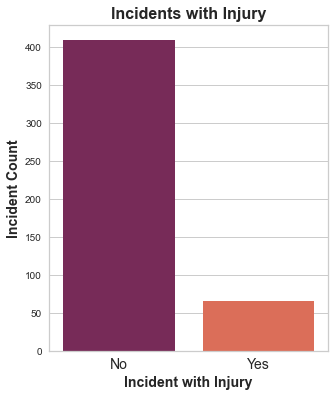

In [19]:
# plotting incidents with injury v incidents with no injury
plt.figure(figsize=(5,6))
sns.countplot(x=df['Incident with Injury'],
data=df,
palette='rocket').set_xticklabels(['No','Yes'], fontsize=14)
plt.xlabel('Incident with Injury', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.title('Incidents with Injury', weight='bold', size=16)
plt.savefig('Incidents with Injury.jpg');

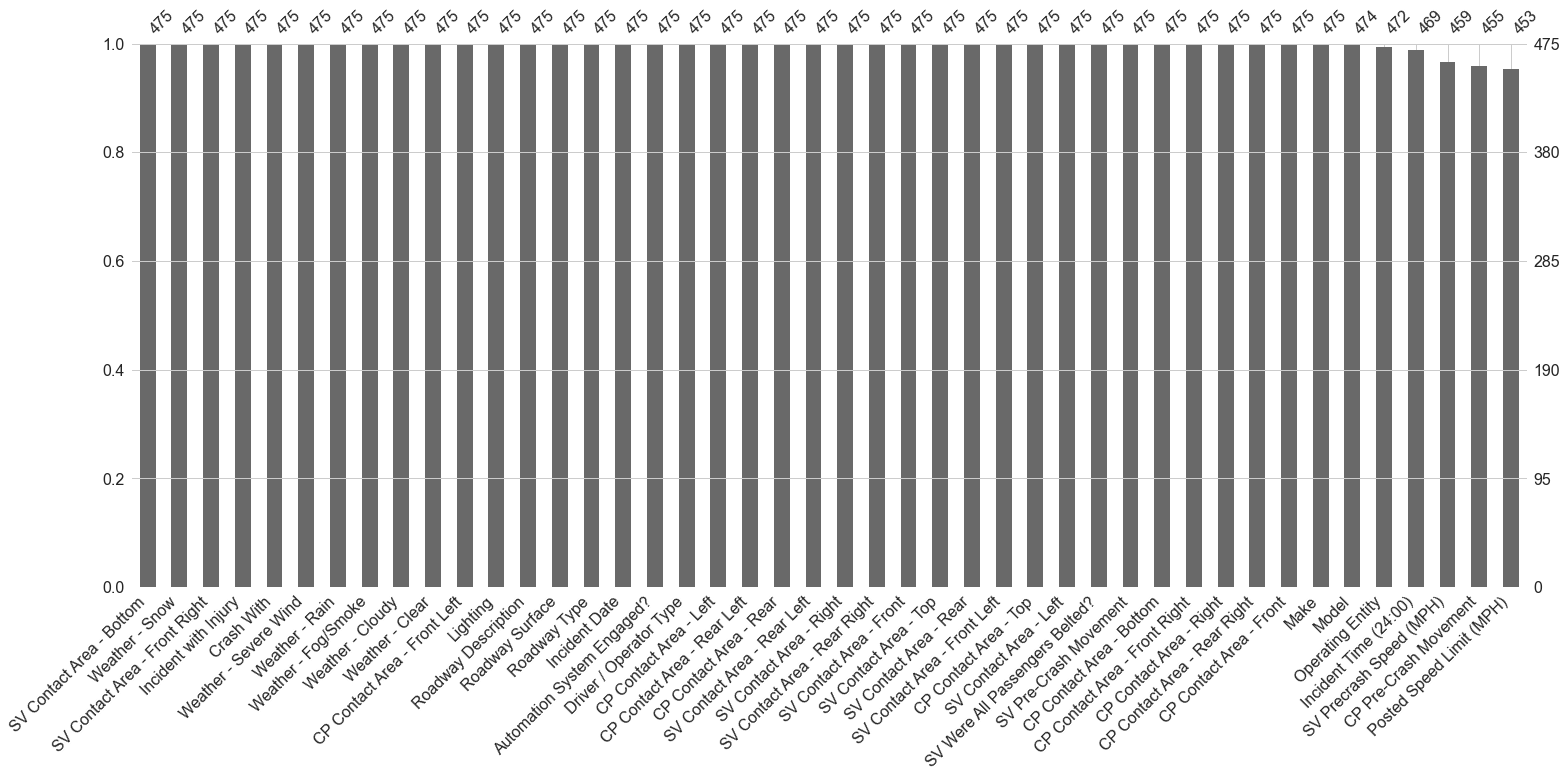

In [20]:
# bar chart for null observation
import missingno as msno
msno.bar(df, sort='descending');

### Identify/Explore Features

Make

In [21]:
# checking column values and remaining nulls
df['Make'].value_counts(dropna=False)

Jaguar                     193
Cruise                      86
Ford                        50
Toyota                      29
Chrysler                    24
Peterbilt                   16
Lexus                       14
Hyundai                     11
Mercedes-Benz                7
Chevrolet                    6
EZ10                         6
FREIGHTLINER                 5
Kenworth Motor Truck Co      3
Jeep                         2
Navya                        2
Ligier                       2
Local Motors                 2
Polestar                     2
EQS                          2
Kenworth                     2
Lucid                        2
Nissan                       1
Ligier Group                 1
International                1
Freightliner                 1
Lincoln                      1
LExus                        1
INTERNATIONAL                1
NAVYA                        1
OLLI                         1
Name: Make, dtype: int64

In [22]:
# defining dictionary map and mapping dictionary on column
make_map = {
    'Jaguar':'Jaguar',
    'Cruise':'Cruise',
    'Ford':'Ford',
    'Toyota':'Toyota',
    'Chrysler':'Chrysler',
    'Peterbilt':'Peterbilt',
    'Lexus':'Lexus',
    'Hyundai':'Hyundai',
    'Mercedes-Benz':'Mercedes-Benz',
    'Chevrolet':'Chevrolet',
    'EZ10':'EZTEN',
    'FREIGHTLINER':'Freightliner',
    'Kenworth Motor Truck Co':'Kenworth',
    'Polestar':'Polestar',
    'Local Motors':'Local Motors',
    'EQS':'EQS',
    'Jeep':'Jeep',
    'Navya':'Navya',
    'Kenworth':'Kenworth',
    'Ligier':'Ligier',
    'Lucid': 'Lucid',
    'OLLI':'OLLI',
    'NAVYA':'Navya',
    'LExus':'Lexus',
    'Ligier Group':'Ligier Group',
    'Lincoln':'Lincoln',
    'Freightliner':'Freightliner',
    'Nissan':'Nissan',
    'International': 'International',
    'INTERNATIONAL': 'International'

}

df['Make']= df['Make'].map(make_map)
df['Make'].value_counts(dropna=False)

Jaguar           193
Cruise            86
Ford              50
Toyota            29
Chrysler          24
Peterbilt         16
Lexus             15
Hyundai           11
Mercedes-Benz      7
Freightliner       6
Chevrolet          6
EZTEN              6
Kenworth           5
Navya              3
International      2
Local Motors       2
Lucid              2
EQS                2
Polestar           2
Jeep               2
Ligier             2
Lincoln            1
OLLI               1
Nissan             1
Ligier Group       1
Name: Make, dtype: int64

Model

In [23]:
# checking column values and remaining nulls
df['Model'].value_counts(dropna=False)

I-Pace            191
AV                 86
Escape             34
Highlander         24
Pacifica           24
Fusion             16
579 Epiq           15
RX450H             12
Kona EV             9
GEN2                6
Bolt                6
T680                5
Sienna              5
CASCADIA            3
EZ10 Gen 3          3
Cascadia            3
S450                3
EQS 450 4Matic      2
S350D               2
Grand Cherokee      2
I-PACE              2
Polestar 2          2
450 4matic          2
RX 450h             2
Dream               2
Olli 1.0            1
Leaf SL             1
LT625               1
1.0                 1
Kona/EV             1
Olli                1
579                 1
Ioniq 5             1
Arma                1
LT 625              1
MKZ                 1
RX450h              1
ARMA                1
NaN                 1
Name: Model, dtype: int64

In [24]:
# removing nulls
df = df.dropna(subset=['Model']).copy()
df.shape

(474, 44)

In [25]:
# dropping column list and checking shape
df = df.drop(columns = ['Model'])
print(df.shape)

(474, 43)


Driver / Operator Type

In [26]:
# checking column values and remaining nulls
df['Driver / Operator Type'].value_counts(dropna=False)

In-Vehicle (Commercial / Test)               356
In-Vehicle and Remote (Commercial / Test)     53
Remote (Commercial / Test)                    39
Other, see Narrative                          12
None                                           9
Consumer                                       3
Unknown                                        2
Name: Driver / Operator Type, dtype: int64

In [27]:
# defining dictionary map and mapping dictionary on column
driver_operator_map = {
    'In-Vehicle (Commercial / Test)': 'In-Vehicle',
    'Consumer': 'Consumer',
    'In-Vehicle and Remote (Commercial / Test)': 'In-Vehicle and Remote',
    'Remote (Commercial / Test)': 'Remote',
    'Other, see Narrative': 'Other',
    'None': 'None',
    'Unknown': 'Other'
}

df['Driver / Operator Type']= df['Driver / Operator Type'].map(driver_operator_map)
df['Driver / Operator Type'].value_counts(dropna=False)

In-Vehicle               356
In-Vehicle and Remote     53
Remote                    39
Other                     14
None                       9
Consumer                   3
Name: Driver / Operator Type, dtype: int64

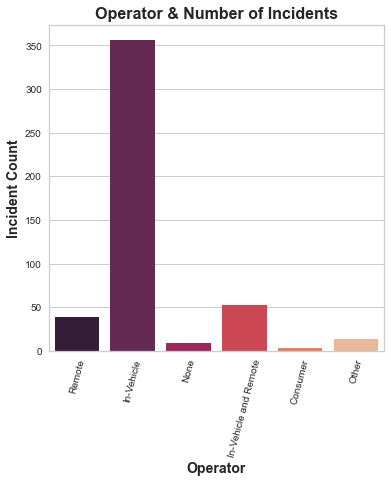

In [28]:
# plotting TRAFFIC_CONTROL_DEVICE by number of incidents
plt.figure(figsize=(6,6))
sns.countplot(x=df['Driver / Operator Type'], 
              data=df, 
              palette='rocket')
plt.xlabel('Operator', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.xticks(rotation=75)
plt.title('Operator & Number of Incidents', weight='bold', size=16);

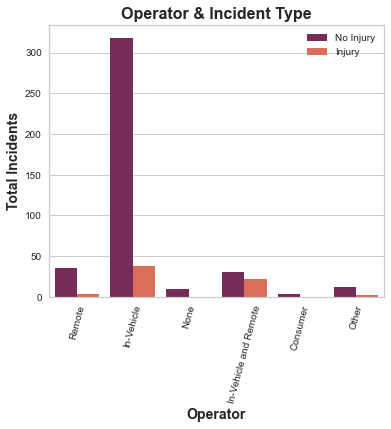

In [29]:
# plotting TRAFFIC_CONTROL_DEVICE by incident type occurrence
plt.figure(figsize=(6,5))
sns.countplot(x='Driver / Operator Type', 
              hue='Incident with Injury', 
              data=df, 
              palette='rocket')
plt.ylabel('Total Incidents', weight='bold', size=14)
plt.xlabel('Operator', weight='bold', size=14)
plt.title('Operator & Incident Type', weight='bold', size=16)
plt.legend(['No Injury','Injury'])
plt.xticks(rotation=75);

<Figure size 360x288 with 0 Axes>

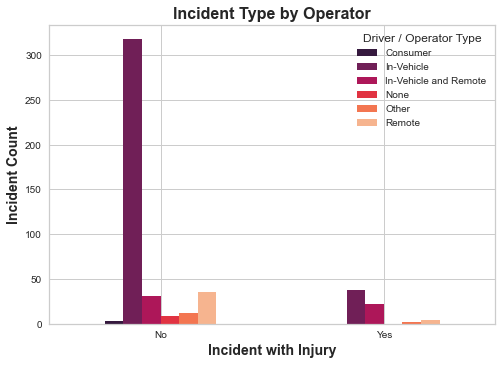

In [30]:
# plotting Incident Type grouped by TRAFFIC_CONTROL_DEVICE
plt.figure(figsize=(5,4))
sns.set_palette('rocket')
df_gb = df.groupby(['Incident with Injury','Driver / Operator Type']).size().unstack(level=1)
df_gb.plot(kind='bar')
plt.xlabel('Incident with Injury', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.xticks(ticks=[0,1], labels = ['No','Yes'], rotation=360)
plt.title('Incident Type by Operator', weight='bold', size=16);

In [31]:
df['Automation System Engaged?'].value_counts(dropna=False)

ADS                       446
Unknown, see Narrative     17
ADAS                       11
Name: Automation System Engaged?, dtype: int64

In [32]:
# dropping column list and checking shape
df = df.drop(columns = ['Automation System Engaged?'])
print(df.shape)

(474, 42)


Operating Entity

In [33]:
df['Operating Entity'].value_counts(dropna=False)

Waymo LLC                                                 194
Cruise LLC                                                 84
Argo AI                                                    50
Waymo LLC.                                                 23
May Mobility                                               18
Zoox                                                       13
Zoox Inc.                                                  11
Pony.ai                                                    10
Waymo, LLC.                                                 9
TORC ROBOTICS, INC                                          6
Colorado School of Mines                                    6
Cruise                                                      5
Kodiak Robotics, Inc.                                       4
NaN                                                         3
First Transit, Inc.                                         3
Beep                                                        2
MBUS    

In [34]:
# defining dictionary map and mapping dictionary on column
operator_entity_map = {
    'Waymo LLC': 'Waymo',                                               
    'Cruise LLC': 'Cruise',                                                 
    'Argo AI': 'Argo AI',                                                     
    'Waymo LLC.': 'Waymo',                                                 
    'May Mobility': 'May Mobility',                                               
    'Zoox': 'Zoox',                                                       
    'Zoox Inc.': 'Zoox',                                                  
    'Pony.ai': 'Pony.ai',                                                    
    'Waymo, LLC.': 'Waymo',                                                 
    'Colorado School of Mines': 'Colorado School of Mines',                                    
    'TORC ROBOTICS, INC': 'TORC ROBOTICS',                                          
    'Cruise': 'Cruise',                                                       
    'Kodiak Robotics, Inc.': 'Kodiak Robotics',                                      
    'First Transit, Inc.': 'First Transit',                                          
    'Beep': 'Beep',                                                                                                                
    'NVIDIA Corporation': 'NVIDIA',                                          
    'MBUS': 'MBUS',                                                        
    'Cruise ': 'Cruise',                                                      
    'Weride Corp': 'Weride',                                                
    'TuSimple': 'TuSimple',                                                     
    'Polestar': 'Polestar',                                                    
    'Apple Inc.': 'Apple',                                                 
    'Mercedes-Benz': 'Mercedes-Benz',                                              
    'Mercedes-Benz Research and Development NA': 'Mercedes-Benz',                   
    'Aurora Operations, Inc.': 'Aurora Operations',                                      
    'Waymo, LLC': 'Waymo',                                                  
    'Waymo, LLC ': 'Waymo',                                                  
    'NVIDIA': 'NVIDIA',                                                      
    'Motional': 'Motional',                                                    
    '5th Generation ADS': '5th Generation ADS',                                          
    'Kodiak Robotics, Inc': 'Kodiak Robotics',                                        
    'BEEP': 'Beep',                                                        
    'Waymo LLC': 'Waymo',                                                   
    'Beep, Inc.': 'Beep',                                                  
    'Formel D  (Independent Contractor Entity)': 'Independent Contractor',                    
    'Marcel Vincent-Casiano  (Lucid Independent Contractor)': 'Independent Contractor',      
    'CRUISE': 'Cruise',    
    'Waymo LLc': 'Waymo',                                     
    'Waymo LLC.': 'Waymo'
}

df['Operating Entity']= df['Operating Entity'].map(operator_entity_map)
df['Operating Entity'].value_counts(dropna=False)

Waymo                       229
Cruise                       92
Argo AI                      50
Zoox                         24
May Mobility                 18
Pony.ai                      10
TORC ROBOTICS                 6
Colorado School of Mines      6
Kodiak Robotics               5
NaN                           5
Mercedes-Benz                 4
Beep                          4
NVIDIA                        3
First Transit                 3
Weride                        2
Apple                         2
TuSimple                      2
Independent Contractor        2
Polestar                      2
MBUS                          2
Motional                      1
Aurora Operations             1
5th Generation ADS            1
Name: Operating Entity, dtype: int64

In [35]:
# removing nulls
df = df.dropna(subset=['Operating Entity']).copy()
df.shape

(469, 42)

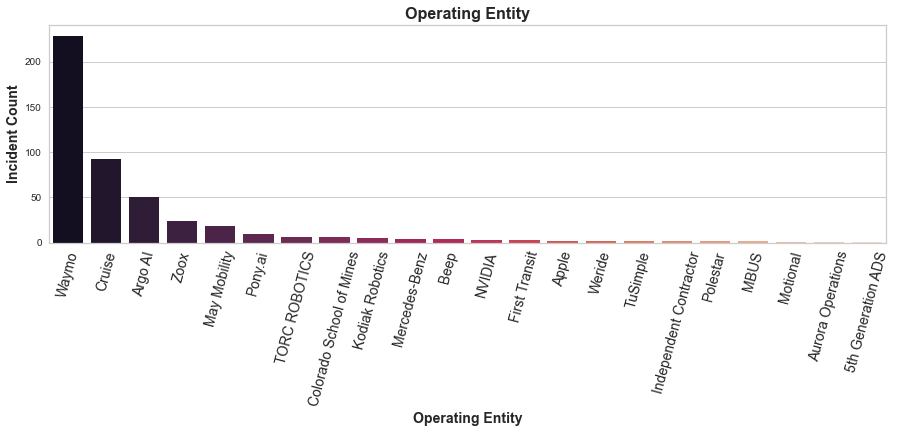

In [36]:
# plotting incidents with injury v incidents with no injury
incident_counts = df['Operating Entity'].value_counts()
plt.figure(figsize=(15,4))
sns.countplot(x=df['Operating Entity'],
              data=df,
              palette='rocket',
              order=incident_counts.index)
plt.xticks(rotation=75,fontsize=14)
plt.xlabel('Operating Entity', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.title('Operating Entity', weight='bold', size=16)
plt.savefig('Incidents with Injury.jpg');

Incident Date

In [37]:
df['Incident Date'].value_counts(dropna=False)

AUG-2022    45
MAR-2022    35
APR-2022    34
JUL-2022    32
OCT-2021    32
MAY-2022    28
JUN-2022    28
NOV-2021    26
JAN-2022    26
SEP-2022    25
SEP-2021    24
AUG-2021    23
JUL-2021    23
DEC-2021    19
FEB-2022    19
DEC-2022    19
NOV-2022    16
OCT-2022    15
Name: Incident Date, dtype: int64

In [38]:
# defining dictionary map and mapping
date_map = {
    'NOV-2021': 'NOV',
    'NOV-2022': 'NOV',
    'FEB-2022': 'FEB',
    'APR-2022': 'APR',
    'MAR-2022': 'MAR',
    'OCT-2021': 'OCT',
    'OCT-2022': 'OCT',
    'AUG-2021': 'AUG',
    'JAN-2022': 'JAN',
    'MAY-2022': 'MAY',
    'DEC-2021': 'DEC',
    'SEP-2021': 'SEP',
    'SEP-2022': 'SEP',
    'JUL-2021': 'JUL',
    'JUN-2022': 'JUN',
    'Unknown': 'Unknown',
    'JUL-2022': 'JUL',
    'JUN-2021': 'JUN',
    'FEB-2020': 'FEB',
    'DEC-2020': 'DEC',
    'DEC-2022': 'DEC',
    'MAY-2020': 'MAY',
    'AUG-2019': 'AUG',
    'AUG-2022': 'AUG',
    'AUG-2021': 'AUG',
    'JUN-2020': 'JUN',
    'NOV-2020': 'NOV',
    'OCT-2019': 'OCT',
    'MAY-2021': 'MAY'
}

df['Incident Date']= df['Incident Date'].map(date_map)
df['Incident Date'].value_counts(dropna=False)

AUG    68
JUL    55
SEP    49
OCT    47
NOV    42
DEC    38
MAR    35
APR    34
MAY    28
JUN    28
JAN    26
FEB    19
Name: Incident Date, dtype: int64

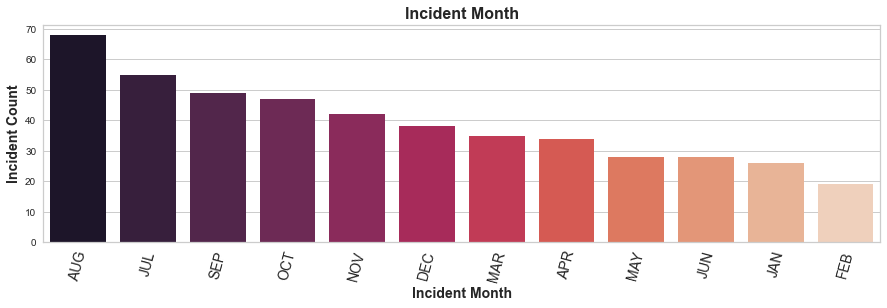

In [39]:
# plotting incidents with injury v incidents with no injury
date_counts = df['Incident Date'].value_counts()
plt.figure(figsize=(15,4))
sns.countplot(x=df['Incident Date'],
              data=df,
              palette='rocket',
              order=date_counts.index)
plt.xticks(rotation=75,fontsize=14)
plt.xlabel('Incident Month', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.title('Incident Month', weight='bold', size=16)
plt.savefig('Incident Month.jpg');

Incident Time (24:00)

In [40]:
df['Incident Time (24:00)'].value_counts(dropna=False)

16:30    7
16:47    7
17:20    7
10:30    7
NaN      6
        ..
06:37    1
09:50    1
07:35    1
15:27    1
13:48    1
Name: Incident Time (24:00), Length: 184, dtype: int64

In [41]:
# removing nulls
df = df.dropna(subset=['Incident Time (24:00)']).copy()
df.shape

(463, 42)

In [42]:
len(df['Incident Time (24:00)'].unique())

183

Roadway Type

In [43]:
df['Roadway Type'].value_counts(dropna=False)

Intersection         196
Street               195
Highway / Freeway     39
Parking Lot           28
Traffic Circle         5
Name: Roadway Type, dtype: int64

In [44]:
# dropping "unknown" values am narrowing focus on known data
df = df.loc[df['Roadway Type'] != 'Unknown'].copy()

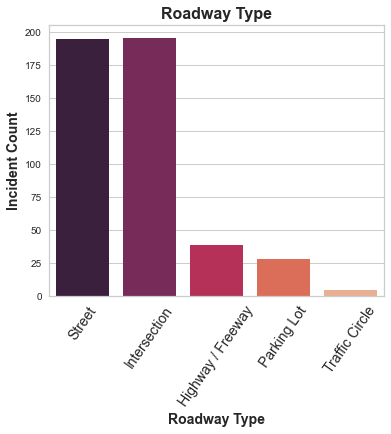

In [45]:
# plotting incidents with injury v incidents with no injury
# date_counts = df['Incident Date'].value_counts()
plt.figure(figsize=(6,5))
sns.countplot(x=df['Roadway Type'],
              data=df,
              palette='rocket',)
              
plt.xticks(rotation=55,fontsize=14)
plt.xlabel('Roadway Type', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.title('Roadway Type', weight='bold', size=16)
plt.savefig('Roadway Type.jpg');

Roadway Surface

In [46]:
df['Roadway Surface'].value_counts(dropna=False)

Dry                   437
Wet                    19
Unknown                 6
Snow / Slush / Ice      1
Name: Roadway Surface, dtype: int64

In [47]:
# dropping "unknown" values am narrowing focus on known data
df = df.loc[df['Roadway Surface'] != 'Unknown'].copy()

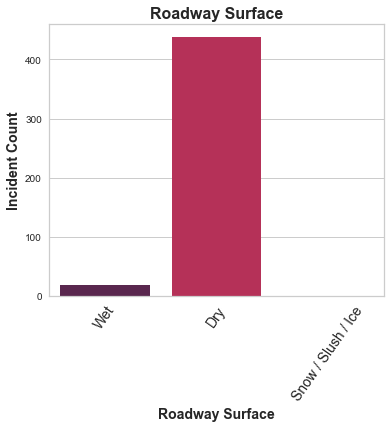

In [48]:
# plotting incidents with injury v incidents with no injury
# date_counts = df['Incident Date'].value_counts()
plt.figure(figsize=(6,5))
sns.countplot(x=df['Roadway Surface'],
              data=df,
              palette='rocket',)
              
plt.xticks(rotation=55,fontsize=14)
plt.xlabel('Roadway Surface', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.title('Roadway Surface', weight='bold', size=16)
plt.savefig('Roadway Surface.jpg');

<Figure size 360x288 with 0 Axes>

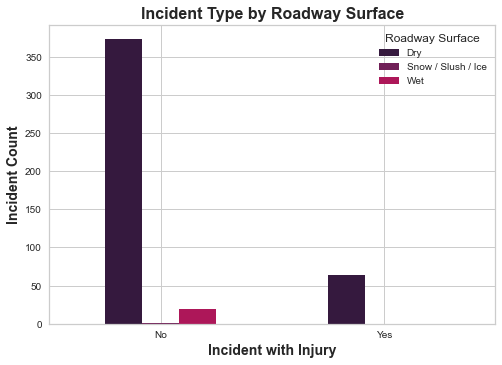

In [49]:
# plotting Incident Type grouped by TRAFFIC_CONTROL_DEVICE
plt.figure(figsize=(5,4))
sns.set_palette('rocket')
df_gb = df.groupby(['Incident with Injury','Roadway Surface']).size().unstack(level=1)
df_gb.plot(kind='bar')
plt.xlabel('Incident with Injury', weight='bold', fontsize=14)
plt.ylabel('Incident Count', weight='bold', fontsize=14)
plt.xticks(ticks=[0,1], labels = ['No','Yes'], rotation=360)
plt.title('Incident Type by Roadway Surface', weight='bold', size=16);

Roadway Description

In [2093]:
df['Roadway Description'].value_counts(dropna=False)

No Unusual Conditions    441
Other, see Narrative       9
Work Zone                  6
Traffic Incident           1
Name: Roadway Description, dtype: int64

In [2094]:
# dropping column and checking shape
df = df.drop(columns = ['Roadway Description'])
print(df.shape)

(457, 41)


Posted Speed Limit (MPH)

In [2095]:
df['Posted Speed Limit (MPH)'].value_counts(dropna=False)

25.0    275
30.0     74
35.0     20
65.0     20
15.0     14
NaN      13
45.0     12
75.0     12
40.0      4
5.0       4
9.0       3
50.0      2
0.0       2
10.0      1
1.0       1
Name: Posted Speed Limit (MPH), dtype: int64

In [2096]:
# dropping "unknown" values am narrowing focus on known data
df = df.loc[df['Posted Speed Limit (MPH)'] != 'Unknown'].copy()

In [2097]:
df['Posted Speed Limit (MPH)'].fillna('25', inplace=True)

Lighting

In [2098]:
df['Lighting'].value_counts(dropna=False)

Daylight              298
Dark - Lighted        139
Dawn / Dusk            16
Dark - Not Lighted      4
Name: Lighting, dtype: int64

Weather - Clear

In [2099]:
df['Weather - Clear'].value_counts(dropna=False)

Y    390
      67
Name: Weather - Clear, dtype: int64

In [2100]:
df['Weather - Clear'] = df['Weather - Clear'].map(lambda x:1 if x == 'Y' else 0)

In [2101]:
df['Weather - Clear'].value_counts(dropna=False)

1    390
0     67
Name: Weather - Clear, dtype: int64

Weather - Snow

In [2102]:
df['Weather - Snow'].value_counts(dropna=False)

     457
Name: Weather - Snow, dtype: int64

In [2103]:
# dropping column and checking shape
df = df.drop(columns = ['Weather - Snow'])
print(df.shape)

(457, 40)


Weather - Cloudy

In [2104]:
df['Weather - Cloudy'].value_counts(dropna=False)

     415
Y     42
Name: Weather - Cloudy, dtype: int64

In [2105]:
df['Weather - Cloudy'] = df['Weather - Cloudy'].map(lambda x:1 if x == 'Y' else 0)

In [2106]:
df['Weather - Cloudy'].value_counts(dropna=False)

0    415
1     42
Name: Weather - Cloudy, dtype: int64

Weather - Fog/Smoke

In [2107]:
df['Weather - Fog/Smoke'].value_counts(dropna=False)

     457
Name: Weather - Fog/Smoke, dtype: int64

In [2108]:
# all no , dropping column
df = df.drop(columns = ['Weather - Fog/Smoke'])

Weather - Rain

In [2109]:
df['Weather - Rain'].value_counts(dropna=False)

     443
Y     14
Name: Weather - Rain, dtype: int64

In [2110]:
df['Weather - Rain'] = df['Weather - Rain'].map(lambda x:1 if x == 'Y' else 0)

In [2111]:
df['Weather - Rain'].value_counts(dropna=False)

0    443
1     14
Name: Weather - Rain, dtype: int64

Weather - Severe Wind

In [2112]:
df['Weather - Severe Wind'].value_counts(dropna=False)

     457
Name: Weather - Severe Wind, dtype: int64

In [2113]:
# all no , dropping column
df = df.drop(columns = ['Weather - Severe Wind'])

In [2114]:
#### Redefining Weather

In [2115]:
df['Weather - Rain/Cloudy'] = df['Weather - Rain'] + df['Weather - Cloudy'] 

In [2116]:
df['Weather - Rain/Cloudy'].value_counts()

0    403
1     52
2      2
Name: Weather - Rain/Cloudy, dtype: int64

In [2117]:
df['Weather - Rain/Cloudy'] = df['Weather - Rain/Cloudy'].map(lambda x:0 if x == 0 else 1)

In [2118]:
df['Weather - Rain/Cloudy'].value_counts()

0    403
1     54
Name: Weather - Rain/Cloudy, dtype: int64

Crash With

In [2119]:
df['Crash With'].value_counts(dropna=False)

Passenger Car               202
SUV                          73
Pickup Truck                 45
Non-Motorist: Cyclist        33
Other, see Narrative         31
Heavy Truck                  17
Van                          17
Motorcycle                   15
Other Fixed Object           15
Non-Motorist: Other           4
Animal                        3
Non-Motorist: Pedestrian      2
Name: Crash With, dtype: int64

In [2120]:
# defining dictionary map and mapping
crash_w_map = {
    'Passenger Car': 'Vehicle',
    'Unknown': 'Unknown',
    'SUV': 'Vehicle',
    'Pickup Truck': 'Vehicle',
    'Other Fixed Object': 'Fixed Object',
    'Other, see Narrative': 'Unknown',
    'Non-Motorist: Cyclist': 'Cyclist/Motorcycle',
    'Heavy Truck': 'Vehicle',
    'Animal': 'Animal',
    'Pole / Tree': 'Fixed Object',
    'Motorcycle': 'Cyclist/Motorcycle',
    'Van': 'Vehicle',
    'Non-Motorist: Pedestrian': 'Pedestrian',
    'Non-Motorist: Other': 'Fixed Object',
    'Bus': 'Bus',
    'First Responder Vehicle':'Vehicle',
}

df['Crash With']= df['Crash With'].map(crash_w_map)
df['Crash With'].value_counts(dropna=False)

Vehicle               354
Cyclist/Motorcycle     48
Unknown                31
Fixed Object           19
Animal                  3
Pedestrian              2
Name: Crash With, dtype: int64

CP Pre-Crash Movement

In [2121]:
# inspecting 'CP Pre-Crash Movement'
df['CP Pre-Crash Movement'].value_counts(dropna=False)

Proceeding Straight            195
Other, see Narrative            53
Changing Lanes                  35
Backing                         35
Making Right Turn               34
Making Left Turn                25
Parked                          16
NaN                             15
Passing                         11
Stopped                          9
Crossing into Opposing Lane      8
Traveling Wrong Way              8
Lane / Road Departure            4
Entering Traffic                 3
NM Moving on Sidewalk            3
Unknown                          2
Merging                          1
Name: CP Pre-Crash Movement, dtype: int64

In [2122]:
veh_pre_crash_map = {
    'Proceeding Straight': 'Proceeding Straight',
    'Unknown': 'Unknown',
    'Backing': 'Backing',
    'Other, see Narrative': 'Unknown',
    'Making Left Turn': 'Left Turn/Right Turn',
    'Making Right Turn': 'Left Turn/Right Turn',
    'Changing Lanes': 'Changing Lanes',
    'Stopped': 'Stopped/Parked',
    'Parked': 'Stopped/Parked',
    'Crossing into Opposing Lane': 'Road Departure / Wrong Way',
    'Passing': 'Passing',
    'Entering Traffic': 'Entering Traffic',
    'Lane / Road Departure': 'Road Departure / Wrong Way',
    'Traveling Wrong Way': 'Road Departure / Wrong Way',  
    'Merging': 'Merging',
    'NM Moving on Sidewalk ': 'Unknown'
}

df['CP Pre-Crash Movement']= df['CP Pre-Crash Movement'].map(veh_pre_crash_map)
df['CP Pre-Crash Movement'].value_counts(dropna=False)

Proceeding Straight           195
Left Turn/Right Turn           59
Unknown                        55
Changing Lanes                 35
Backing                        35
Stopped/Parked                 25
Road Departure / Wrong Way     20
NaN                            18
Passing                        11
Entering Traffic                3
Merging                         1
Name: CP Pre-Crash Movement, dtype: int64

In [2123]:
df['CP Pre-Crash Movement'].fillna('Unknown', inplace=True)

In [2124]:
### Binning

In [2125]:
### Vehicle Incident Contact

In [2126]:
# changing values to binary
df['CP Contact Area - Rear Left'] = df['CP Contact Area - Rear Left'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Left'] = df['CP Contact Area - Left'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Front Left'] = df['CP Contact Area - Front Left'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Rear'] = df['CP Contact Area - Rear'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Top'] = df['CP Contact Area - Top'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Front'] = df['CP Contact Area - Front'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Rear Right'] = df['CP Contact Area - Rear Right'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Right'] = df['CP Contact Area - Right'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Front Right'] = df['CP Contact Area - Front Right'].map(lambda x:1 if x == 'Y' else 0)
df['CP Contact Area - Bottom'] = df['CP Contact Area - Bottom'].map(lambda x:1 if x == 'Y' else 0)

#### Redefining Front

CP Contact Area - Rear Left

In [2127]:
df['Vehicle Contact Front'] = df['CP Contact Area - Front Left'] + df['CP Contact Area - Front'] + df['CP Contact Area - Front Right']

In [2128]:
df['Vehicle Contact Front'].value_counts()

0    231
1    133
3     59
2     34
Name: Vehicle Contact Front, dtype: int64

In [2129]:
df['Vehicle Contact Front'] = df['Vehicle Contact Front'].map(lambda x:0 if x == 0 else 1)

In [2130]:
df['Vehicle Contact Front'].value_counts()

0    231
1    226
Name: Vehicle Contact Front, dtype: int64

#### Redefining Rear

In [2131]:
df['Vehicle Contact Rear'] = df['CP Contact Area - Rear Left'] + df['CP Contact Area - Rear'] + df['CP Contact Area - Rear Right']

In [2132]:
df['Vehicle Contact Rear'].value_counts()

0    386
1     69
3      2
Name: Vehicle Contact Rear, dtype: int64

In [2133]:
df['Vehicle Contact Rear'] = df['Vehicle Contact Rear'].map(lambda x:0 if x == 0 else 1)

In [2134]:
df['Vehicle Contact Rear'].value_counts()

0    386
1     71
Name: Vehicle Contact Rear, dtype: int64

#### Redefining Left

In [2135]:
df['Vehicle Contact Left'] = df['CP Contact Area - Left'] 

In [2136]:
df['Vehicle Contact Left'].value_counts()

0    419
1     38
Name: Vehicle Contact Left, dtype: int64

#### Redefining Right

In [2137]:
df['Vehicle Contact Right'] = df['CP Contact Area - Right']

In [2138]:
df['Vehicle Contact Right'].value_counts()

0    425
1     32
Name: Vehicle Contact Right, dtype: int64

In [2139]:
#### Redefining Top/Bottom

In [2140]:
df['Vehicle Contact Top/Bottom'] = df['CP Contact Area - Top'] + df['CP Contact Area - Bottom']

In [2141]:
df['Vehicle Contact Top/Bottom'].value_counts()

0    452
1      5
Name: Vehicle Contact Top/Bottom, dtype: int64

In [2142]:
## Remaining Columns

In [2143]:
#### Redefining 'SV Pre-Crash Movement'

In [2144]:
df['SV Pre-Crash Movement'].value_counts(dropna=False)

Stopped                  179
Proceeding Straight      168
Making Left Turn          29
Making Right Turn         24
Other, see Narrative      19
Changing Lanes            14
Backing                   12
Lane / Road Departure      6
Entering Traffic           5
Parked                     1
Name: SV Pre-Crash Movement, dtype: int64

In [2145]:
# defining dictionary map and mapping
precrash_map = {
    'Proceeding Straight': 'Proceeding Straight',
    'Stopped': 'Stopped/Parked',
    'Unknown': 'Unknown',
    'Making Left Turn': 'Left Turn/Right Turn',
    'Making Right Turn': 'Left Turn/Right Turn',
    'Other, see Narrative': 'Unknown',
    'Changing Lanes': 'Changing Lanes',
    'Backing': 'Backing',
    'Entering Traffic': 'Entering Traffic',
    'Lane / Road Departure': 'Road Departure / Wrong Way',
    'Making U-Turn': 'Making U-Turn',
    'Crossing into Opposing Lane': 'Road Departure / Wrong Way',
    'Merging: Other': 'Merging',
    'Parked': 'Stopped/Parked',
}

df['SV Pre-Crash Movement']= df['SV Pre-Crash Movement'].map(precrash_map)
df['SV Pre-Crash Movement'].value_counts(dropna=False)

Stopped/Parked                180
Proceeding Straight           168
Left Turn/Right Turn           53
Unknown                        19
Changing Lanes                 14
Backing                        12
Road Departure / Wrong Way      6
Entering Traffic                5
Name: SV Pre-Crash Movement, dtype: int64

#### Redefining 'SV Were All Passengers Belted?'

SV Were All Passengers Belted?  

In [2146]:
df['SV Were All Passengers Belted?'].value_counts(dropna=False)

Yes                         397
No Passengers in Vehicle     53
No, see Narrative             6
Unknown                       1
Name: SV Were All Passengers Belted?, dtype: int64

In [2147]:
# defining dictionary map and mapping
belt_map = {
    'Yes': 'Yes',
    'Unknown': 'Unknown',
    'No Passengers in Vehicle': 'No Passengers in Vehicle',
    'No, see Narrative': 'No',
}

df['SV Were All Passengers Belted?']= df['SV Were All Passengers Belted?'].map(belt_map)
df['SV Were All Passengers Belted?'].value_counts(dropna=False)

Yes                         397
No Passengers in Vehicle     53
No                            6
Unknown                       1
Name: SV Were All Passengers Belted?, dtype: int64

In [2148]:
df['SV Were All Passengers Belted?'].fillna('Yes', inplace=True)

#### Redefining 'SV Precrash Speed (MPH)'

In [2149]:
df['SV Precrash Speed (MPH)'].value_counts(dropna=False)

0.0     207
1.0      23
2.0      22
4.0      14
7.0      14
9.0      13
8.0      13
18.0     13
11.0     11
13.0     11
19.0      9
3.0       9
6.0       8
10.0      8
NaN       7
25.0      6
5.0       6
21.0      6
35.0      6
15.0      5
58.0      4
59.0      4
12.0      4
62.0      4
22.0      4
50.0      3
23.0      3
55.0      2
24.0      2
61.0      2
20.0      2
45.0      2
14.0      2
51.0      2
70.0      2
65.0      2
64.0      1
17.0      1
Name: SV Precrash Speed (MPH), dtype: int64

In [2150]:
# removing nulls
df = df.dropna(subset=['SV Precrash Speed (MPH)']).copy()
df.shape

(450, 44)

In [2151]:
# defining dictionary map and mapping
precrash_speed_map = {
    0.0: 0,     
    1.0: 5,      
    2.0: 5,     
    4.0: 5,       
    7.0: 10,      
    9.0: 10,       
    8.0: 10,       
    18.0: 20,      
    11.0: 15,     
    13.0: 15,     
    19.0: 20,     
    3.0: 5,       
    6.0: 10,      
    10.0: 10,            
    25.0: 30,      
    5.0: 5,      
    21.0: 25,      
    35.0: 35,     
    15.0:15,      
    58.0:60,      
    59.0:60,      
    12.0:15,      
    62.0:65,     
    22.0:25,      
    50.0:50,      
    23.0:25,      
    55.0:55,      
    24.0:25,     
    61.0:65,      
    20.0:20,      
    45.0:45,      
    14.0:15,      
    51.0:55,      
    70.0:70,      
    65.0:65,      
    64.0:65,      
    17.0: 20     
}

df['SV Precrash Speed (MPH)']= df['SV Precrash Speed (MPH)'].map(precrash_speed_map)
df['SV Precrash Speed (MPH)'].value_counts(dropna=False)

0     207
5      74
10     56
15     33
20     25
25     15
65      9
60      8
35      6
30      6
55      4
50      3
70      2
45      2
Name: SV Precrash Speed (MPH), dtype: int64

#### Other Vehicle Incident Contact
#### Binning Columns

In [2152]:
# changing values to binary
df['SV Contact Area - Rear Left'] = df['SV Contact Area - Rear Left'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Left'] = df['SV Contact Area - Left'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Front Left'] = df['SV Contact Area - Front Left'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Rear'] = df['SV Contact Area - Rear'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Top'] = df['SV Contact Area - Top'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Front'] = df['SV Contact Area - Front'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Rear Right'] = df['SV Contact Area - Rear Right'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Right'] = df['SV Contact Area - Right'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Front Right'] = df['SV Contact Area - Front Right'].map(lambda x:1 if x == 'Y' else 0)
df['SV Contact Area - Bottom'] = df['SV Contact Area - Bottom'].map(lambda x:1 if x == 'Y' else 0)

In [2153]:
#### Redefining SV Front

In [2154]:
df['Other Vehicle Contact Front'] = df['SV Contact Area - Front Left'] + df['SV Contact Area - Front'] + df['SV Contact Area - Front Right']

In [2155]:
df['Other Vehicle Contact Front'].value_counts()

0    316
1    105
3     18
2     11
Name: Other Vehicle Contact Front, dtype: int64

In [2156]:
df['Other Vehicle Contact Front'] = df['Other Vehicle Contact Front'].map(lambda x:0 if x == 0 else 1)

In [2157]:
df['Other Vehicle Contact Front'].value_counts()

0    316
1    134
Name: Other Vehicle Contact Front, dtype: int64

#### Redefining SV Rear

In [2158]:
df['Other Vehicle Contact Rear'] = df['SV Contact Area - Rear Left'] + df['SV Contact Area - Rear'] + df['SV Contact Area - Rear Right']

In [2159]:
df['Other Vehicle Contact Rear'].value_counts()

1    187
0    175
2     45
3     43
Name: Other Vehicle Contact Rear, dtype: int64

In [2160]:
df['Other Vehicle Contact Rear'] = df['Other Vehicle Contact Rear'].map(lambda x:0 if x == 0 else 1)

In [2161]:
df['Other Vehicle Contact Rear'].value_counts()

1    275
0    175
Name: Other Vehicle Contact Rear, dtype: int64

#### Redefining SV Left

In [2162]:
df['Other Vehicle Contact Left'] = df['SV Contact Area - Left']

In [2163]:
df['Other Vehicle Contact Left'].value_counts()

0    421
1     29
Name: Other Vehicle Contact Left, dtype: int64

#### Redefining SV Right

In [2164]:
df['Other Vehicle Contact Right'] = df['SV Contact Area - Right'] 

In [2165]:
df['Other Vehicle Contact Right'].value_counts()

0    409
1     41
Name: Other Vehicle Contact Right, dtype: int64

#### Redefining SV Top/Bottom

In [2166]:
df['Other Vehicle Contact Top/Bottom'] = df['SV Contact Area - Top'] + df['SV Contact Area - Bottom'] 

In [2167]:
df['Other Vehicle Contact Top/Bottom'].value_counts()

0    426
1     24
Name: Other Vehicle Contact Top/Bottom, dtype: int64

In [2168]:
df['Other Vehicle Contact Top/Bottom'] = df['Other Vehicle Contact Top/Bottom'].map(lambda x:0 if x == 0 else 1)

In [2169]:
df['Other Vehicle Contact Top/Bottom'].value_counts()

0    426
1     24
Name: Other Vehicle Contact Top/Bottom, dtype: int64

In [2170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 515
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Make                              450 non-null    object
 1   Driver / Operator Type            450 non-null    object
 2   Operating Entity                  450 non-null    object
 3   Incident Date                     450 non-null    object
 4   Incident Time (24:00)             450 non-null    object
 5   Roadway Type                      450 non-null    object
 6   Roadway Surface                   450 non-null    object
 7   Posted Speed Limit (MPH)          450 non-null    object
 8   Lighting                          450 non-null    object
 9   Weather - Clear                   450 non-null    int64 
 10  Weather - Cloudy                  450 non-null    int64 
 11  Weather - Rain                    450 non-null    int64 
 12  Crash With            

Narrative

In [2171]:
# drop columns that were binned to other columns
more_columns =  ['SV Contact Area - Rear Left', 'SV Contact Area - Left', 'SV Contact Area - Front Left','SV Contact Area - Rear','SV Contact Area - Top','SV Contact Area - Front','SV Contact Area - Rear Right','SV Contact Area - Right' ,'SV Contact Area - Front Right', 'SV Contact Area - Bottom'] 

In [2172]:
df = df.drop(columns = more_columns)

In [2173]:
more_columns2 =  ['CP Contact Area - Rear Left', 'CP Contact Area - Left', 'CP Contact Area - Front Left','CP Contact Area - Rear','CP Contact Area - Top','CP Contact Area - Front','CP Contact Area - Rear Right','CP Contact Area - Right' ,'CP Contact Area - Front Right', 'CP Contact Area - Bottom', 'Weather - Clear', 'Weather - Cloudy', 'Weather - Rain'] 

In [2174]:
df = df.drop(columns = more_columns2)

In [2175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 515
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Make                              450 non-null    object
 1   Driver / Operator Type            450 non-null    object
 2   Operating Entity                  450 non-null    object
 3   Incident Date                     450 non-null    object
 4   Incident Time (24:00)             450 non-null    object
 5   Roadway Type                      450 non-null    object
 6   Roadway Surface                   450 non-null    object
 7   Posted Speed Limit (MPH)          450 non-null    object
 8   Lighting                          450 non-null    object
 9   Crash With                        450 non-null    object
 10  Incident with Injury              450 non-null    int64 
 11  CP Pre-Crash Movement             450 non-null    object
 12  SV Pre-Crash Movement 

In [2176]:
print(df.corr()['Incident with Injury'].abs().sort_values(ascending=False))

Incident with Injury                1.000000
Other Vehicle Contact Front         0.181678
Other Vehicle Contact Rear          0.168213
Vehicle Contact Left                0.123663
Other Vehicle Contact Top/Bottom    0.096649
Vehicle Contact Right               0.085378
Vehicle Contact Rear                0.071520
Weather - Rain/Cloudy               0.062984
Vehicle Contact Front               0.056333
Vehicle Contact Top/Bottom          0.043162
SV Precrash Speed (MPH)             0.006503
Other Vehicle Contact Right         0.003734
Other Vehicle Contact Left          0.003225
Name: Incident with Injury, dtype: float64


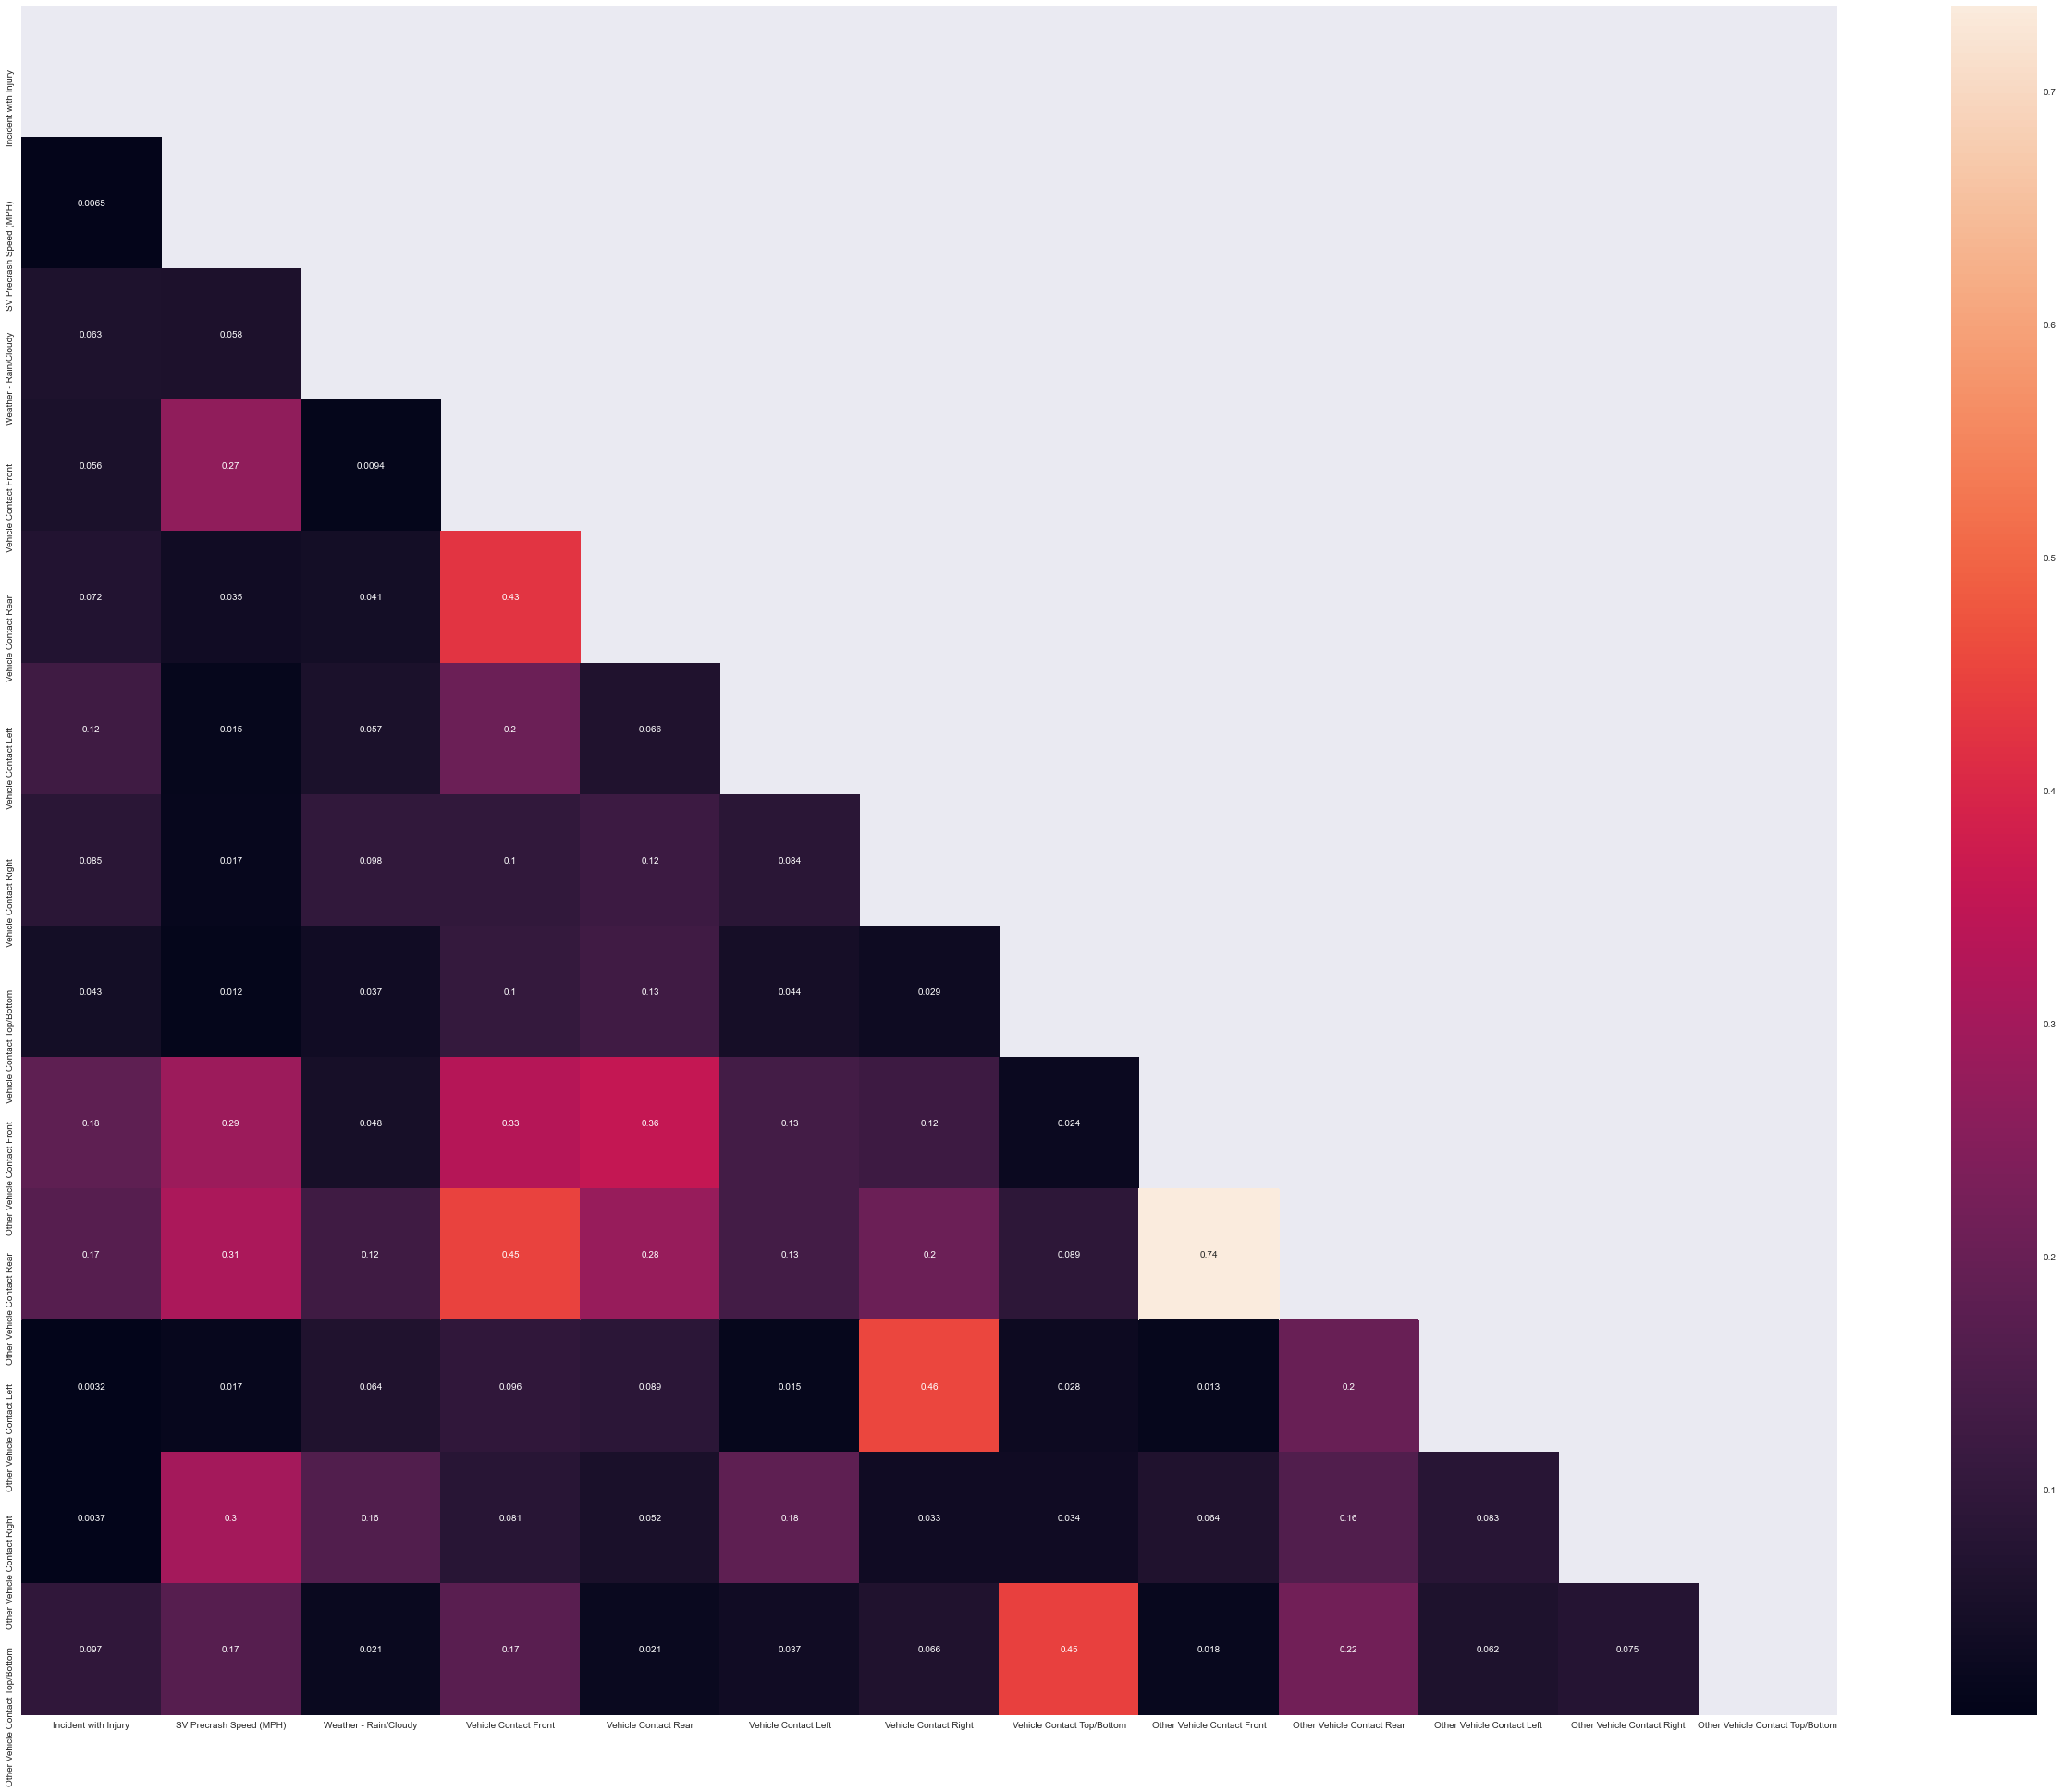

In [2177]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(44, 34))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    ax = sns.heatmap(abs(df.corr()),mask=mask,annot=True);

In [2178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 515
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Make                              450 non-null    object
 1   Driver / Operator Type            450 non-null    object
 2   Operating Entity                  450 non-null    object
 3   Incident Date                     450 non-null    object
 4   Incident Time (24:00)             450 non-null    object
 5   Roadway Type                      450 non-null    object
 6   Roadway Surface                   450 non-null    object
 7   Posted Speed Limit (MPH)          450 non-null    object
 8   Lighting                          450 non-null    object
 9   Crash With                        450 non-null    object
 10  Incident with Injury              450 non-null    int64 
 11  CP Pre-Crash Movement             450 non-null    object
 12  SV Pre-Crash Movement 

In [2179]:
# setting X, y for train-test-split
target = 'Incident with Injury'
X = df.drop(columns= target)
y = df[target]

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [2180]:
#### Preprocessing Numeric Columns

In [2181]:
# list of numeric columns 
num_cols = df.drop(columns=target).select_dtypes('int64').columns.tolist()
num_cols

['SV Precrash Speed (MPH)',
 'Weather - Rain/Cloudy',
 'Vehicle Contact Front',
 'Vehicle Contact Rear',
 'Vehicle Contact Left',
 'Vehicle Contact Right',
 'Vehicle Contact Top/Bottom',
 'Other Vehicle Contact Front',
 'Other Vehicle Contact Rear',
 'Other Vehicle Contact Left',
 'Other Vehicle Contact Right',
 'Other Vehicle Contact Top/Bottom']

In [2182]:
# creating a pipeline 

num_transform = Pipeline([('scale', StandardScaler())])

In [2183]:
#### Categorical Columns

In [2184]:
# list of categorical columns 
cat_cols = df.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['Make',
 'Driver / Operator Type',
 'Operating Entity',
 'Incident Date',
 'Incident Time (24:00)',
 'Roadway Type',
 'Roadway Surface',
 'Posted Speed Limit (MPH)',
 'Lighting',
 'Crash With',
 'CP Pre-Crash Movement',
 'SV Pre-Crash Movement',
 'SV Were All Passengers Belted?']

In [2185]:
# creating a pipeline
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [2186]:
# combine both pipelines into one using columntransformer 
preprocessor = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)],
    remainder='passthrough'
)

In [2187]:


# create final model with grid search best parameters
gbc = imbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('classifier', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42))
])



In [2188]:


# train the best pipeline on the entire training set 
gbc.fit(X_train, y_train)



TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
# classification report using function 
evaluate_classification(gbc,
                        X_train, 
                        X_val, 
                        y_train, 
                        y_val, 
                        label='GBC')

In [ ]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_trans = preprocessing.fit_transform(X_train)
X_test_trans = preprocessing.transform(X_test)